In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.losses import categorical_crossentropy
from keras.utils import np_utils
from keras.datasets import mnist

Using TensorFlow backend.


(60000, 28, 28)


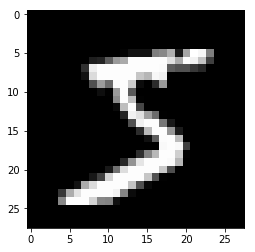

In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
plt.imshow(x_train[0],cmap='gray')

In [15]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
img_len = x_train[0].shape[0]

In [16]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
print(y_train[0])

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


In [17]:
validate_th = int(0.7 * x_train.shape[0])
x_valid = x_train[validate_th:].copy()
y_valid = y_train[validate_th:].copy()
x_train = x_train[:validate_th]
y_train = y_train[:validate_th]


In [18]:
model = Sequential()
model.add(Dense(units=100,input_dim= img_len, activation='softmax'))
model.add(Dense(10, activation='softmax'))

In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.1),
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, 
          batch_size=32, epochs=100, verbose=1,validation_data=(x_valid,y_valid))

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 3s - loss: 1.5286 - acc: 0.3972 - val_loss: 1.4783 - val_acc: 0.4057

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


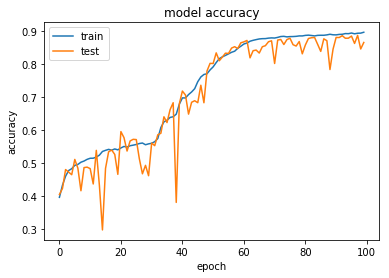

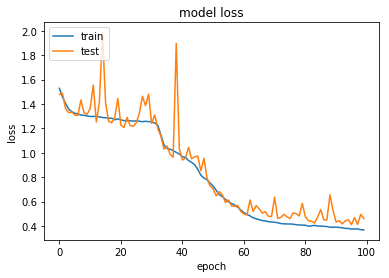

In [26]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
score = model.evaluate(x_test, y_test, verbose=1)
print(score)

 8960/10000 [=========================>....] - ETA: 0s[0.45534483397006986, 0.86629999999999996]


In [29]:
history.params

{'batch_size': 32,
 'do_validation': True,
 'epochs': 100,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc'],
 'samples': 42000,
 'verbose': 1}